In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os



pd.set_option('display.max_columns',500)
plt.style.use('ggplot')

In [3]:
columns_subset = [
    "FlightDate",
    "Airline",
    "Origin",                                    
    "Dest",                                   
    "Cancelled",                               
    "Diverted",                                
    "CRSDepTime",                                  
    "DepTime",                          
    "DepDelayMinutes",                                   
    "OriginAirportID",                                    
    "OriginStateName",                                  
    "DestAirportID",                                              
    "DestStateName"                          
]

In [4]:
downloadfile = os.listdir(os.getcwd())
downloadfile = [files for  files in downloadfile if files.endswith(".parquet")]

downloadfile

['Combined_Flights_2018.parquet',
 'Combined_Flights_2019.parquet',
 'Combined_Flights_2020.parquet',
 'Combined_Flights_2021.parquet',
 'Combined_Flights_2022.parquet']

- >  Make change of original columns data types in order to keep memory low
- >  Concat dataframe 

In [5]:
dataframe_list = []
cat_cols = ['Airline','Origin','Dest','OriginStateName','DestStateName']
for files in downloadfile:
    df = pd.read_parquet(files, columns=columns_subset)
    for c in cat_cols:
        df[c] = df[c].astype('category')
    dataframe_list.append(df)

flights_df = pd.concat(dataframe_list,axis=0)


In [11]:
flights_df['FlightDate'] = flights_df['FlightDate'].astype("datetime64")
flights_df['Year'] = flights_df['FlightDate'].dt.year

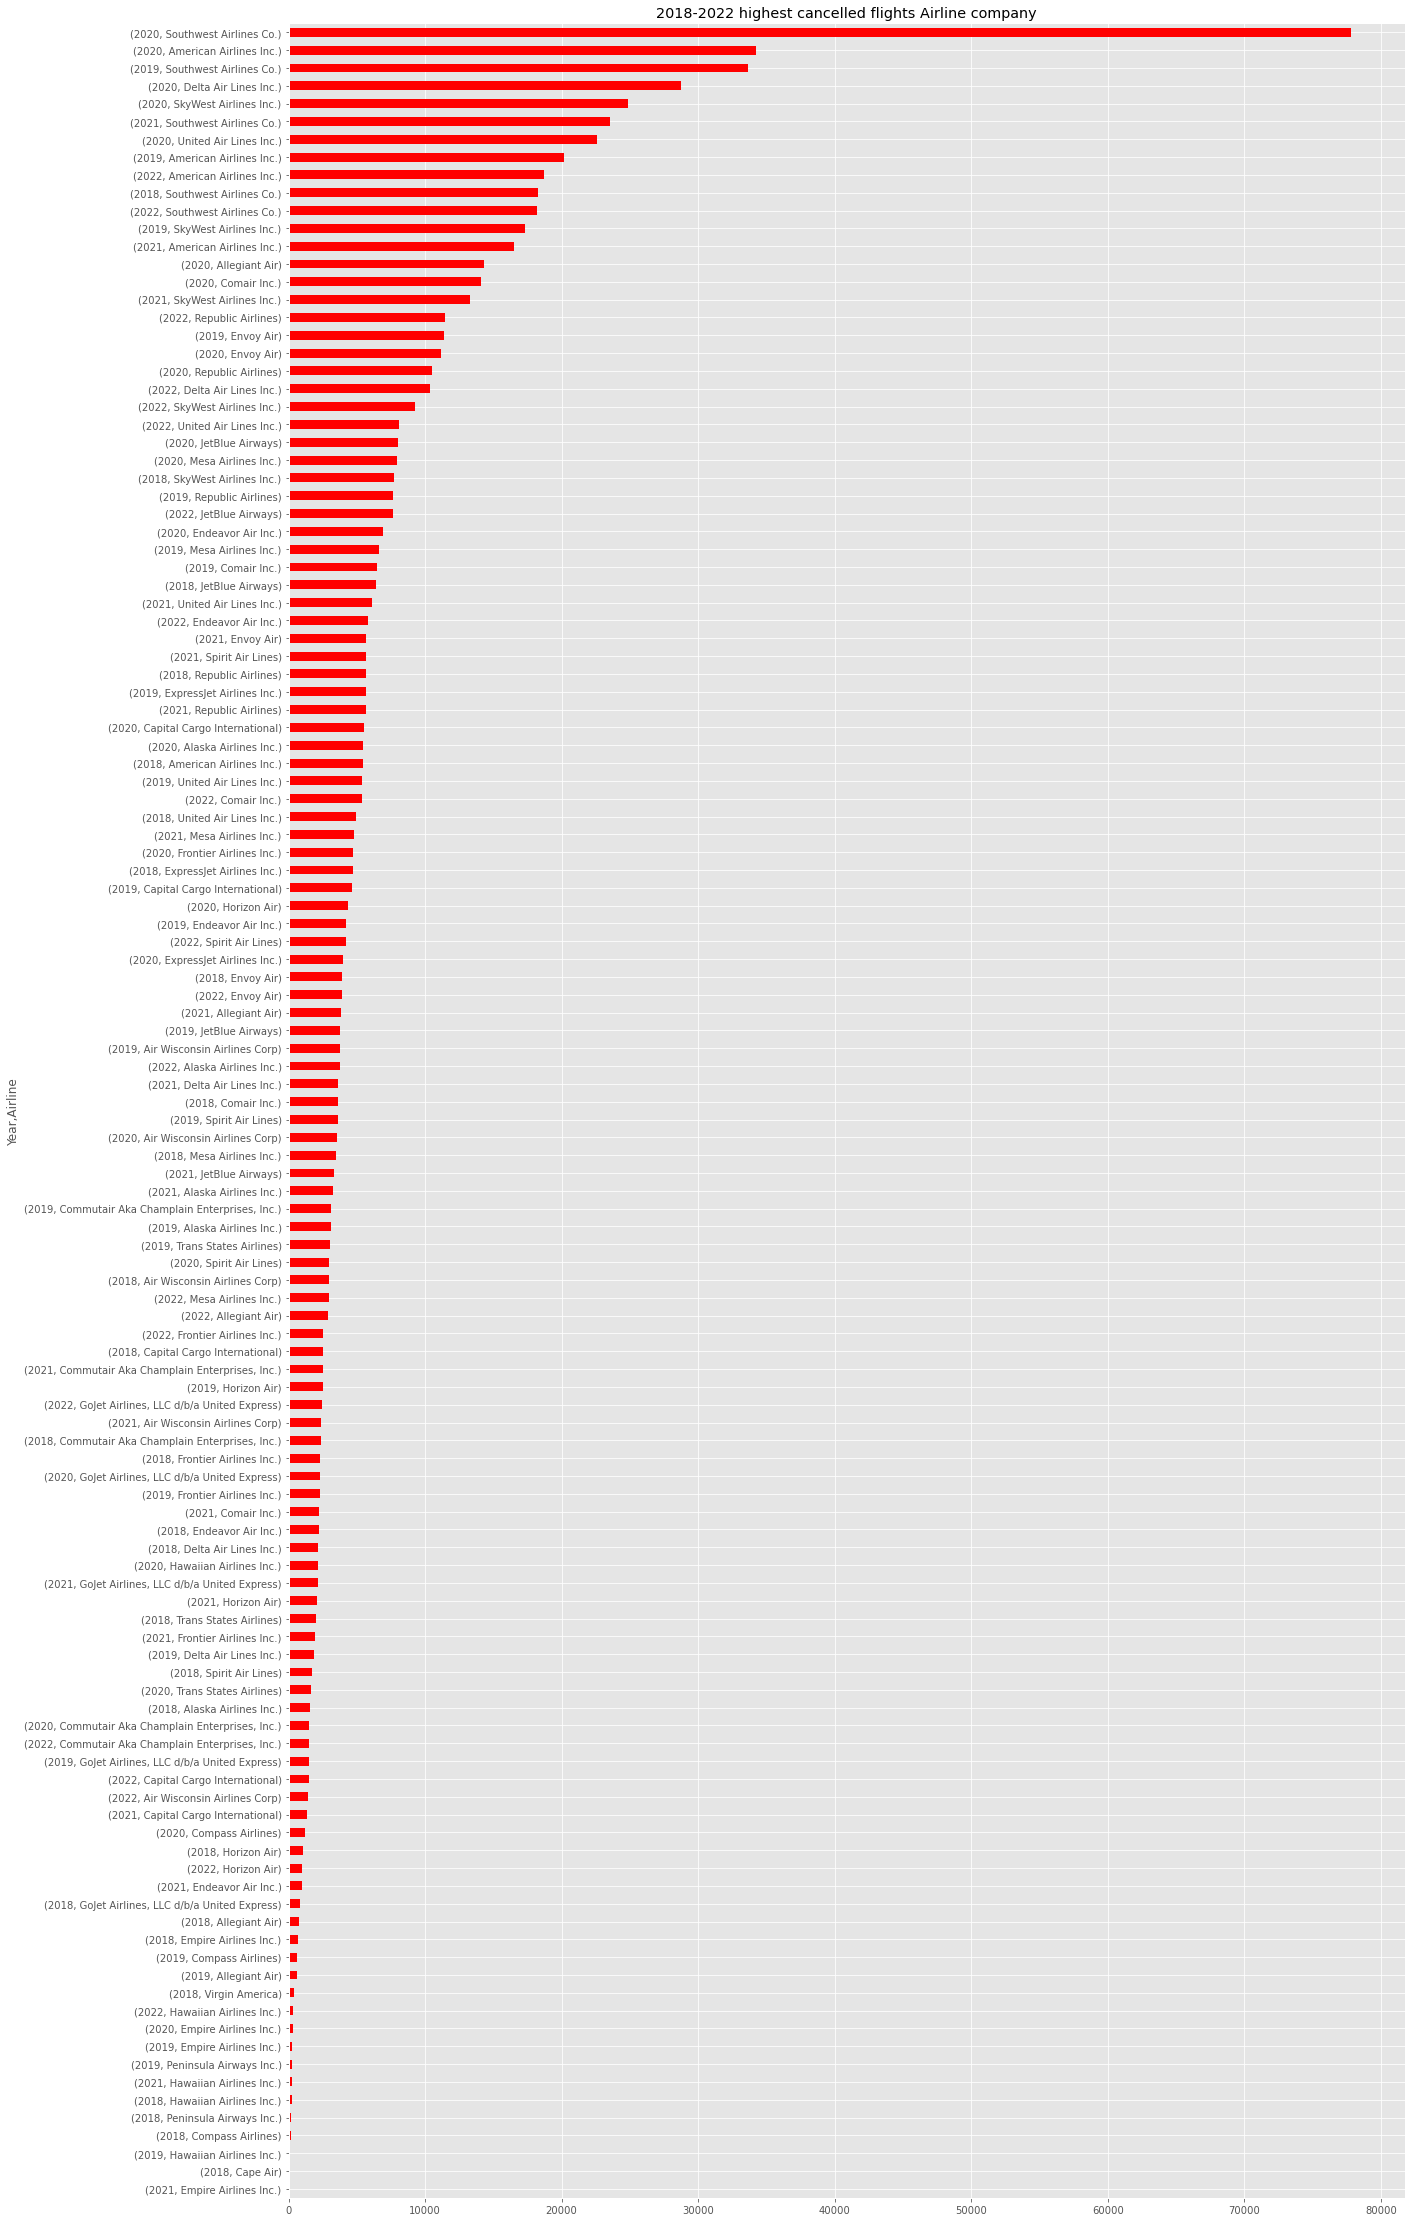

In [12]:
flights_df.groupby(['Year', 'Airline'])['Cancelled'].apply(lambda x: (x == True).sum()).sort_values().plot(
    kind='barh', color='red', figsize=(20, 40), title='2018-2022 highest cancelled flights Airline company')


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestAirportID,DestCityName,DestStateName,Year
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,10146,Georgia,10397,"Atlanta, GA",Georgia,2018
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,10146,Georgia,10397,"Atlanta, GA",Georgia,2018
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,10146,Georgia,10397,"Atlanta, GA",Georgia,2018
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,10146,Georgia,10397,"Atlanta, GA",Georgia,2018
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,10146,Georgia,10397,"Atlanta, GA",Georgia,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637609,2018-09-11,Air Wisconsin Airlines Corp,SCE,IAD,False,False,1445,1433.0,0.0,14711,Pennsylvania,12264,"Washington, DC",Virginia,2018
637610,2018-09-11,Air Wisconsin Airlines Corp,IAD,GSO,False,False,1235,1224.0,0.0,12264,Virginia,11995,"Greensboro/High Point, NC",North Carolina,2018
637611,2018-09-11,Air Wisconsin Airlines Corp,EVV,ORD,False,False,1030,1016.0,0.0,11612,Indiana,13930,"Chicago, IL",Illinois,2018
637612,2018-09-11,Air Wisconsin Airlines Corp,ORD,HPN,False,False,1410,1403.0,0.0,13930,Illinois,12197,"White Plains, NY",New York,2018
